In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Netflix Dataset.csv')

In [3]:
print(df.shape) 
print(df.dtypes)  
print(df.isnull().sum()) 
print(df.describe())

(8807, 12)
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df["director"].fillna("Unknown", inplace=True)
df["cast"].fillna("Unknown", inplace=True)
df["country"].fillna("Unknown", inplace=True)
df["rating"].fillna(df["rating"].mode()[0],inplace = True)
df["date_added"].fillna(df["release_year"].astype(str),inplace = True)
df["duration"].fillna(df["duration"].mode()[0],inplace = True)


C:\Users\Saikiran Goud M\AppData\Local\Temp\ipykernel_13828\2241468478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["director"].fillna("Unknown", inplace=True)
C:\Users\Saikiran Goud M\AppData\Local\Temp\ipykernel_13828\2241468478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [6]:

df_cast = df.assign(Actor=df["cast"].str.split(", ")).explode("Actor")

df_cast.drop(columns=["cast"], inplace=True)

df_cast.reset_index(drop=True, inplace=True)

print(df_cast.head())

  show_id     type                 title         director        country  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson  United States   
1      s2  TV Show         Blood & Water          Unknown   South Africa   
2      s2  TV Show         Blood & Water          Unknown   South Africa   
3      s2  TV Show         Blood & Water          Unknown   South Africa   
4      s2  TV Show         Blood & Water          Unknown   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA  2 Seasons   
3  September 24, 2021          2021  TV-MA  2 Seasons   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   
2  International TV Shows, TV Dramas, 

In [7]:
df_cast.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,Actor
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown
1,s2,TV Show,Blood & Water,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba


In [8]:
missing_values = df['rating'].isna().sum()
print(missing_values)

0


In [9]:
df[df['rating'].isin(["74 min","84 min", "66 min"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,1 Season,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,1 Season,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,1 Season,Movies,The comic puts his trademark hilarious/thought...


In [10]:
df["rating"] = df["rating"].replace(["74 min", "84 min", "66 min"], "NR")


In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df["duration_numeric"] = np.where(
    df["type"] == "Movie",
    df["duration"].str.split(" ").str[0].astype(float),
    np.nan
)

df["seasons"] = np.where(
    df["type"] == "TV Show",
    df["duration"].str.split(" ").str[0].astype(float),
    np.nan
)

df.drop(columns=["duration"], inplace=True)

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_numeric,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0


In [15]:
print(df["type"].value_counts())  # Count of Movies vs. TV Shows
print(df["rating"].value_counts())  # Distribution of ratings
print(df["country"].value_counts().head(10))  # Top 10 countries producing content
print(df["listed_in"].value_counts().head(10))  # Most common genres

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            83
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215


C:\Users\Saikiran Goud M\AppData\Local\Temp\ipykernel_13828\940230354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="coolwarm")


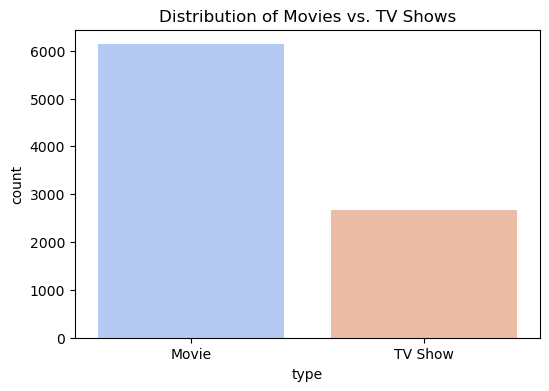

In [16]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", palette="coolwarm")
plt.title("Distribution of Movies vs. TV Shows")
plt.show()

C:\Users\Saikiran Goud M\AppData\Local\Temp\ipykernel_13828\393142171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["rating"], order=df["rating"].value_counts().index, palette="coolwarm")


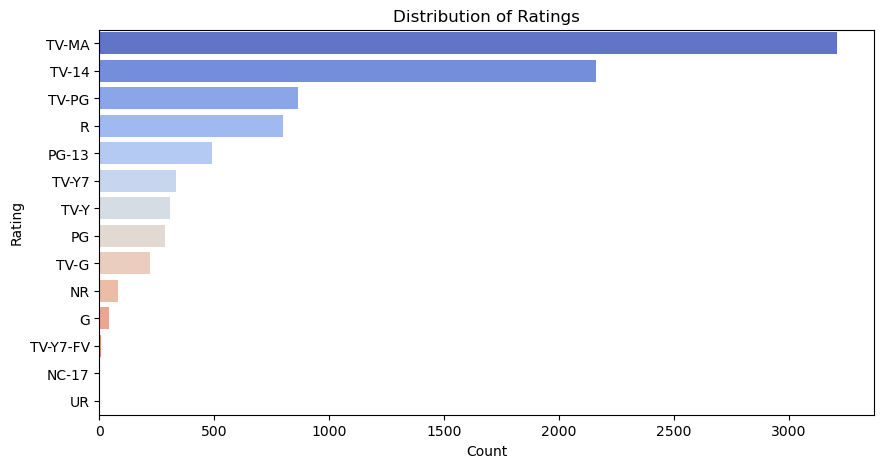

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(y=df["rating"], order=df["rating"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

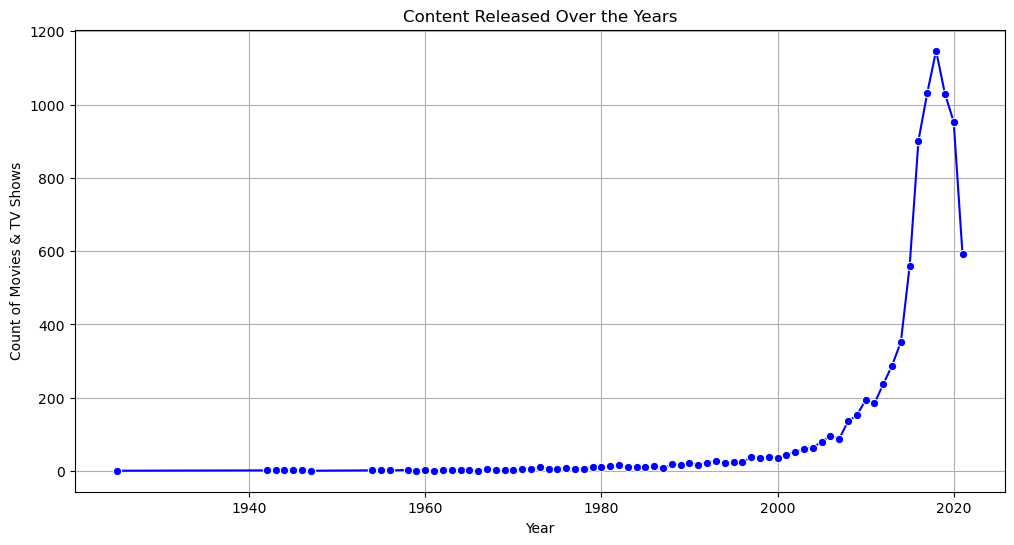

In [18]:
# Count content per year
release_trend = df["release_year"].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker="o", color="blue")
plt.title("Content Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Count of Movies & TV Shows")
plt.grid(True)
plt.show()


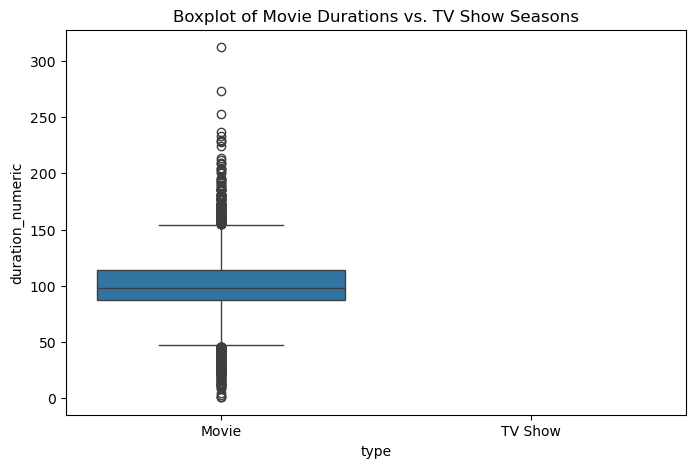

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="type", y="duration_numeric")
plt.title("Boxplot of Movie Durations vs. TV Show Seasons")
plt.show()

C:\Users\Saikiran Goud M\AppData\Local\Temp\ipykernel_13828\713423486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["country"].value_counts().head(10).index,


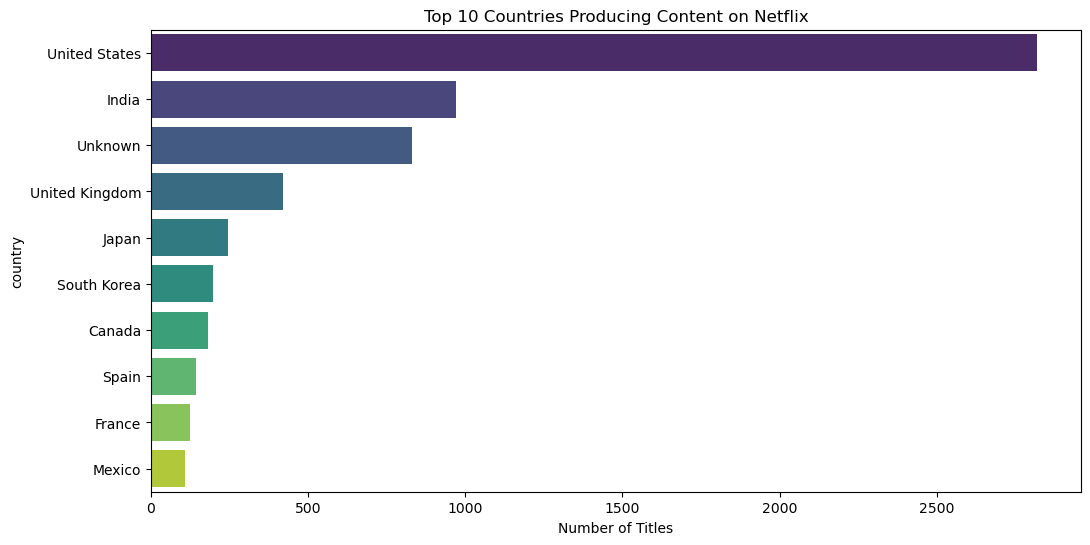

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(y=df["country"].value_counts().head(10).index, 
            x=df["country"].value_counts().head(10).values, 
            palette="viridis")
plt.title("Top 10 Countries Producing Content on Netflix")
plt.xlabel("Number of Titles")
plt.show()


C:\Users\Saikiran Goud M\AppData\Local\Temp\ipykernel_13828\1208776487.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts.head(10), x="Count", y="Genre", palette="mako")


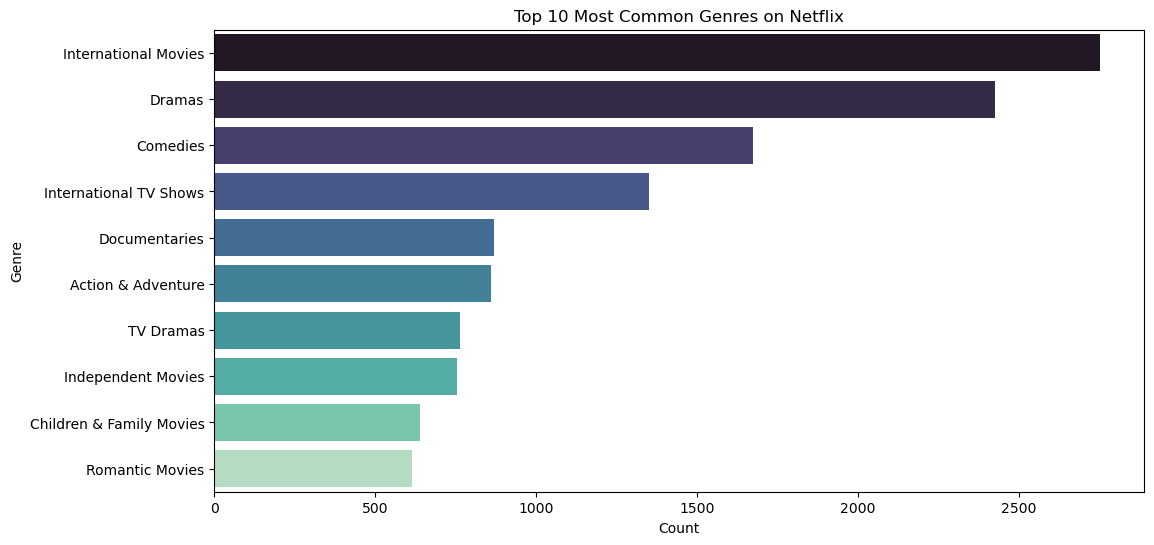

In [21]:
# Split genres and explode the column
genre_df = df["listed_in"].dropna().str.split(", ").explode()

# Count occurrences and sort
genre_counts = genre_df.value_counts().reset_index()
genre_counts.columns = ["Genre", "Count"]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=genre_counts.head(10), x="Count", y="Genre", palette="mako")
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()



In [22]:
top_actors = df_cast['Actor'].value_counts().head(10)
top_directors = df_cast['director'].value_counts().head(10)

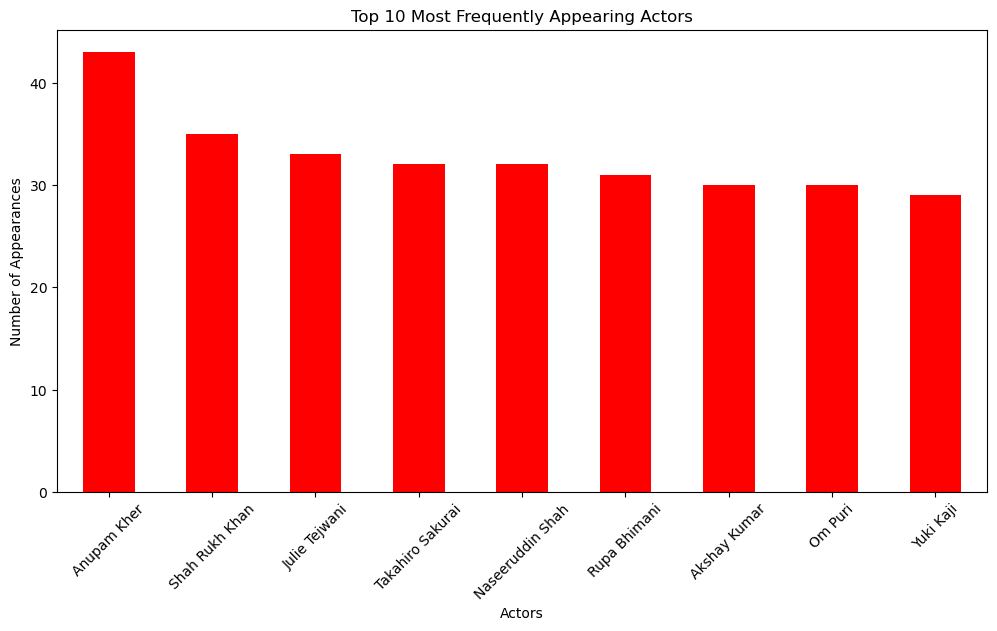

In [23]:
filtered_actors = top_actors[top_actors.index != "Unknown"]
plt.figure(figsize=(12, 6))
filtered_actors.plot(kind='bar', color='red')
plt.xlabel("Actors")
plt.ylabel("Number of Appearances")
plt.title("Top 10 Most Frequently Appearing Actors")
plt.xticks(rotation=45)
plt.show()

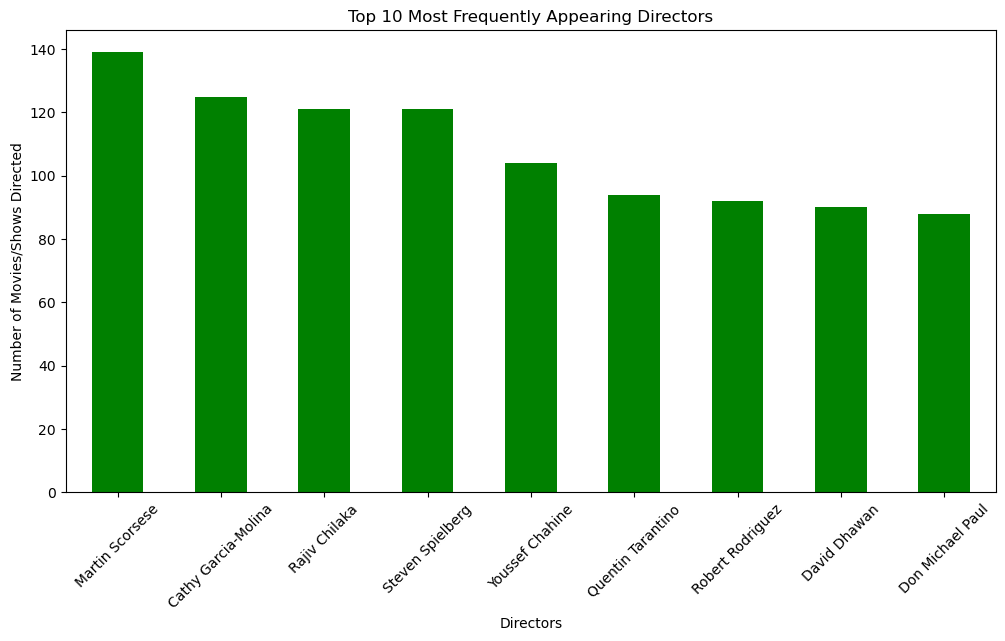

In [24]:
filtered_directors = top_directors[top_directors.index != "Unknown"]

plt.figure(figsize=(12, 6))
filtered_directors.plot(kind='bar', color='green')
plt.xlabel("Directors")
plt.ylabel("Number of Movies/Shows Directed")
plt.title("Top 10 Most Frequently Appearing Directors")
plt.xticks(rotation=45)
plt.show()

 #  **Insights from Analysis**

 ### Content Type Distribution: Netflix contains more Movies than TV Shows.
 ### Release Trend: The number of releases has  increased in the last 10-15 years compared to the past years.
 ### Most Common Genres: The top genres are Dramas, Comedies, and International TV Shows.
 ### when compared with Country-wise Analysis: The US, India, and UK produce the highest number of shows/movies on Netflix.
 ### Shifting Focus: Netflix has been producing more TV Shows in recent years to get attention of the subcribers

# **Conclusion**
### By analyzing Netflix’s content trends, we identified key focus areas for expansion, content strategy, and audience targeting.
###  These  insights can help Netflix stay ahead in the streaming market by making data-driven decisions on what to produce next.

# **Business Recommendations for Netflix**
### 1. Expand TV Show Production: Netflix should continue investing in TV Shows, especially in trending genres like Crime, Thriller, and International Dramas.

### 2. Country-Specific Strategy: Focus on India & South Korea: High engagement in Bollywood & K-Dramas.

### 3. Best Release Timing:  More content is released toward the end of the year,Target holiday seasons for big releases.


### 4. Top Genres to Focus On: For Movies: Action,and Documentaries

###                           For TV Shows: Crime, Thriller, International Series.

### 5. Director & Actor Collaboration: sign exclusive deals with directors & actors from successful projects

 